<a href="https://colab.research.google.com/github/CateMerfeld/class_work/blob/main/deep_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist
# !pip install tensorflow-gpu==2.0.0-rc1
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LeakyReLU
# import warnings
# warnings.filterwarnings('ignore')

# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt
# import pandas as pd
# from keras.layers import  Conv2D, MaxPooling2D

# Preprocess your data so that you can feed it into ANN models. Split your data into training and test sets:
---
This dataset is already separated into training and testing when we load it. See preprocessing below. 

In [ ]:
# load data and preprocess
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# 28*28 = dimensions of each image
input_dim = 784 
# dataset documentation specifies that there are 10 classes
output_dim = nb_classes = 10

# reshape images so they can be fed into model
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Try different ANN models and train them on your training set:
---
You can play with the following:

* Number of layers
* Activation functions of the layers
* Number of neurons in the layers
* Different batch sizes during training

**Compare your models' training scores and interpret your results.**

**Evaluate how your models perform on your test set. Compare the results of your models.**

In [ ]:
# one-hot encode target variable using to_categorical()
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

Starting with a very simple model. 

In [ ]:
# create a model object
model = Sequential()

# add layers to the model
# first dense layer
model.add(Dense(64, input_shape=(784,), activation='tanh'))
# second dense layer
model.add(Dense(64, activation='tanh'))
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# define an optimizer and compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 80
epochs = 20

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
750/750 [==============================] - 4s 3ms/step - loss: 0.7037 - accuracy: 0.7580 - val_loss: 0.4311 - val_accuracy: 0.8439
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3860 - accuracy: 0.8602 - val_loss: 0.4007 - val_accuracy: 0.8540
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3445 - accuracy: 0.8735 - val_loss: 0.3685 - val_accuracy: 0.8660
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3222 - accuracy: 0.8796 - val_loss: 0.3794 - val_accuracy: 0.8612
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3078 - accuracy: 0.8884 - val_loss: 0.3653 - val_accuracy: 0.8688
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2932 - accuracy: 0.8923 - val_loss: 0.3575 - val_accuracy: 0.8697
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2777 - accuracy: 0.8983 - val_loss: 0.3416 - val_accuracy: 0.8751
Epoch 

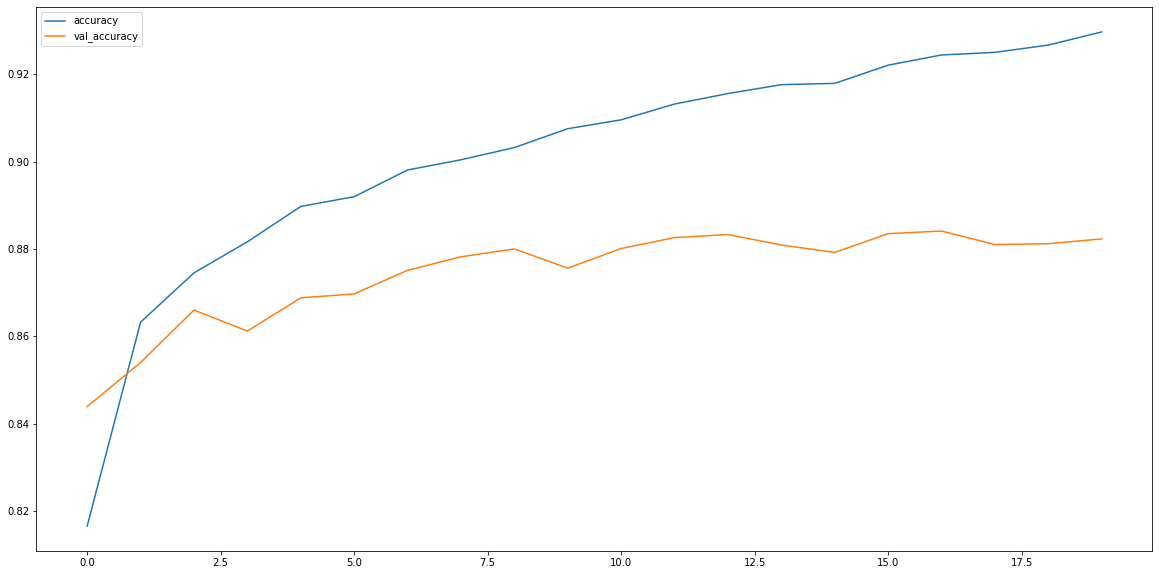

In [ ]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.show()

This model comes in at about 93% accuracy for the training set and about 88% for the testing set. We're not seeing enormous loss for either set.

I'll try this same model with an additional layer.

In [ ]:
# create a model object
model = Sequential()

# add layers to the model
# first dense layer
model.add(Dense(64, input_shape=(784,), activation='tanh'))
# second dense layer
model.add(Dense(64, activation='tanh'))
# third dense layer
model.add(Dense(32, activation='tanh'))
# output layer
model.add(Dense(10, activation='softmax'))

# define an optimizer and compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 80
epochs = 20

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.7520 - accuracy: 0.7511 - val_loss: 0.4437 - val_accuracy: 0.8375
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3855 - accuracy: 0.8623 - val_loss: 0.3898 - val_accuracy: 0.8599
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3415 - accuracy: 0.8751 - val_loss: 0.4156 - val_accuracy: 0.8505
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3248 - accuracy: 0.8822 - val_loss: 0.3623 - val_accuracy: 0.8689
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3012 - accuracy: 0.8898 - val_loss: 0.3645 - val_accuracy: 0.8693
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2859 - accuracy: 0.8952 - val_loss: 0.3502 - val_accuracy: 0.8728
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2754 - accuracy: 0.8991 - val_loss: 0.3645 - val_accuracy: 0.8702
Epoch 

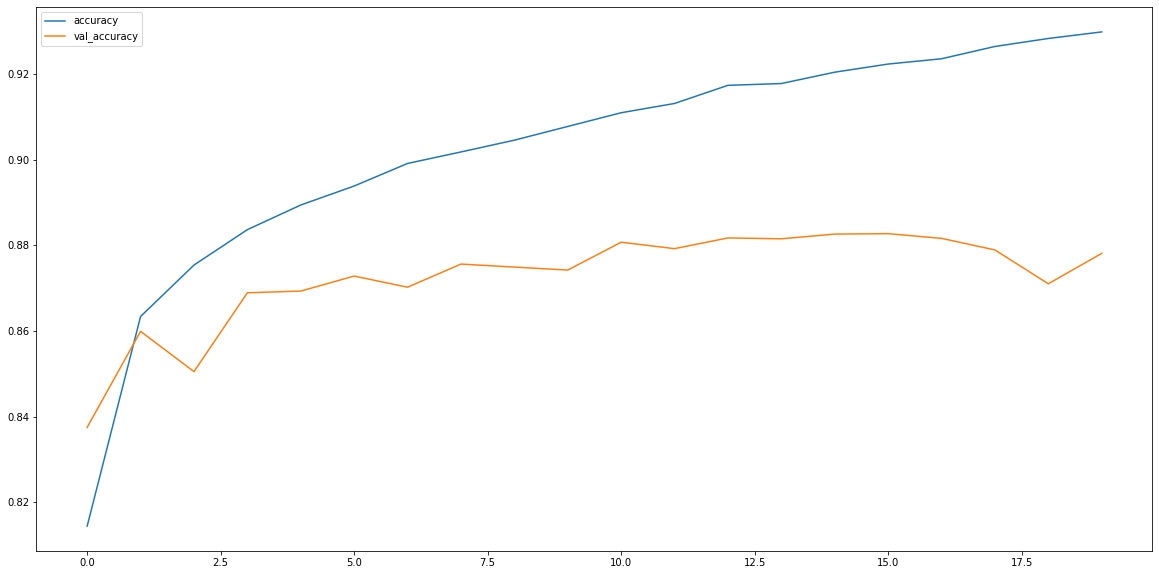

In [ ]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.show()

The scores for this model are very similar. We saw a very slight increase in accuracy for the training set, and a very slight accuracy decrease for the test set. The test set's loss also increased.

Since this model's performance was slightly worse than the first model's, I'll try changing the first model to use `relu` activation.

In [ ]:
# create a model object
model = Sequential()

# add layers to the model
# first dense layer
model.add(Dense(64, input_shape=(784,), activation='relu'))
# second dense layer
model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# define an optimizer and compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 80
epochs = 20

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.7664 - accuracy: 0.7361 - val_loss: 0.4452 - val_accuracy: 0.8436
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4149 - accuracy: 0.8532 - val_loss: 0.4180 - val_accuracy: 0.8510
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3580 - accuracy: 0.8693 - val_loss: 0.3976 - val_accuracy: 0.8569
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3322 - accuracy: 0.8789 - val_loss: 0.3717 - val_accuracy: 0.8663
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3119 - accuracy: 0.8873 - val_loss: 0.3676 - val_accuracy: 0.8721
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2943 - accuracy: 0.8913 - val_loss: 0.3553 - val_accuracy: 0.8744
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2929 - accuracy: 0.8920 - val_loss: 0.3628 - val_accuracy: 0.8715
Epoch 

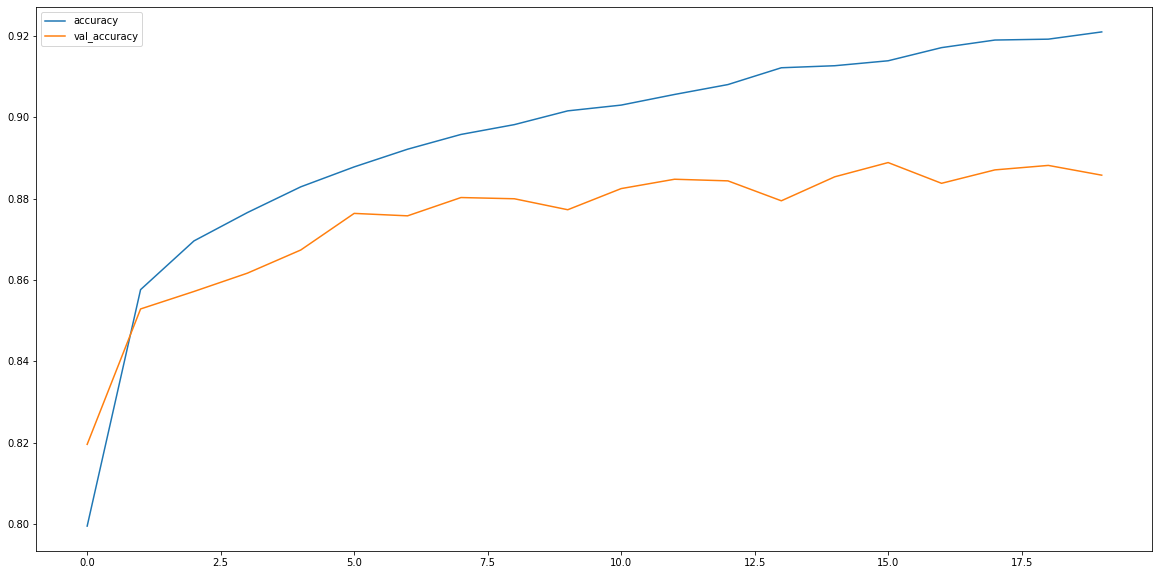

In [ ]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.show()

Although the differences were slight, this model's performance was worse than the first model's across the board. It performed slightly better than the last model on the test data.  

Next I'll try the first model again, with a different batch size. 

In [ ]:
# create a model object
model = Sequential()

# add layers to the model
# first dense layer
model.add(Dense(64, input_shape=(784,), activation='tanh'))
# second dense layer
model.add(Dense(64, activation='tanh'))
# output layer
model.add(Dense(10, activation='softmax'))

# define an optimizer and compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 120
epochs = 20

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 0.7643 - accuracy: 0.7461 - val_loss: 0.4393 - val_accuracy: 0.8411
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3976 - accuracy: 0.8557 - val_loss: 0.4187 - val_accuracy: 0.8520
Epoch 3/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.8706 - val_loss: 0.3860 - val_accuracy: 0.8599
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8799 - val_loss: 0.3732 - val_accuracy: 0.8680
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.8835 - val_loss: 0.3606 - val_accuracy: 0.8680
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 0.2975 - accuracy: 0.8911 - val_loss: 0.3492 - val_accuracy: 0.8740
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.8997 - val_loss: 0.3496 - val_accuracy: 0.8764
Epoch 

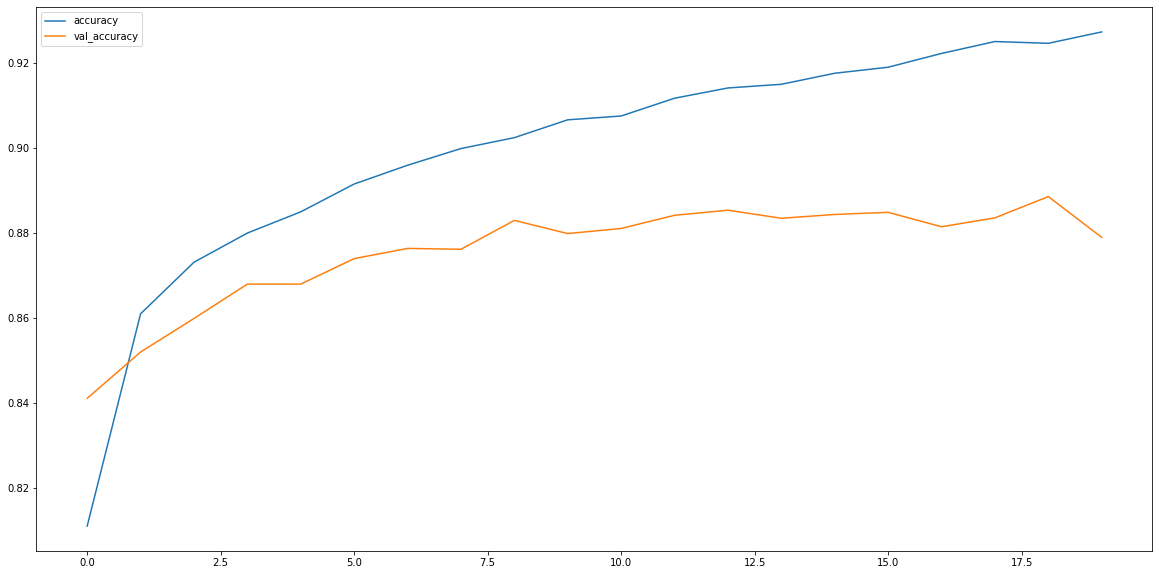

In [ ]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.show()

This model's performance was also worse across the board. I'll try one more model where I change the number of neurons in the layers. 

In [ ]:
# create a model object
model = Sequential()

# add layers to the model
# first dense layer
model.add(Dense(256, input_shape=(784,), activation='tanh'))
# second dense layer
model.add(Dense(128, activation='tanh'))
# output layer
model.add(Dense(10, activation='softmax'))

# define an optimizer and compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 80
epochs = 20

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.5860 - accuracy: 0.7904 - val_loss: 0.4078 - val_accuracy: 0.8536
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3702 - accuracy: 0.8652 - val_loss: 0.4228 - val_accuracy: 0.8436
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3319 - accuracy: 0.8762 - val_loss: 0.3569 - val_accuracy: 0.8688
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3034 - accuracy: 0.8872 - val_loss: 0.3478 - val_accuracy: 0.8734
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2797 - accuracy: 0.8958 - val_loss: 0.3463 - val_accuracy: 0.8737
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2672 - accuracy: 0.9006 - val_loss: 0.3310 - val_accuracy: 0.8787
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2510 - accuracy: 0.9073 - val_loss: 0.3263 - val_accuracy: 0.8808
Epoch 

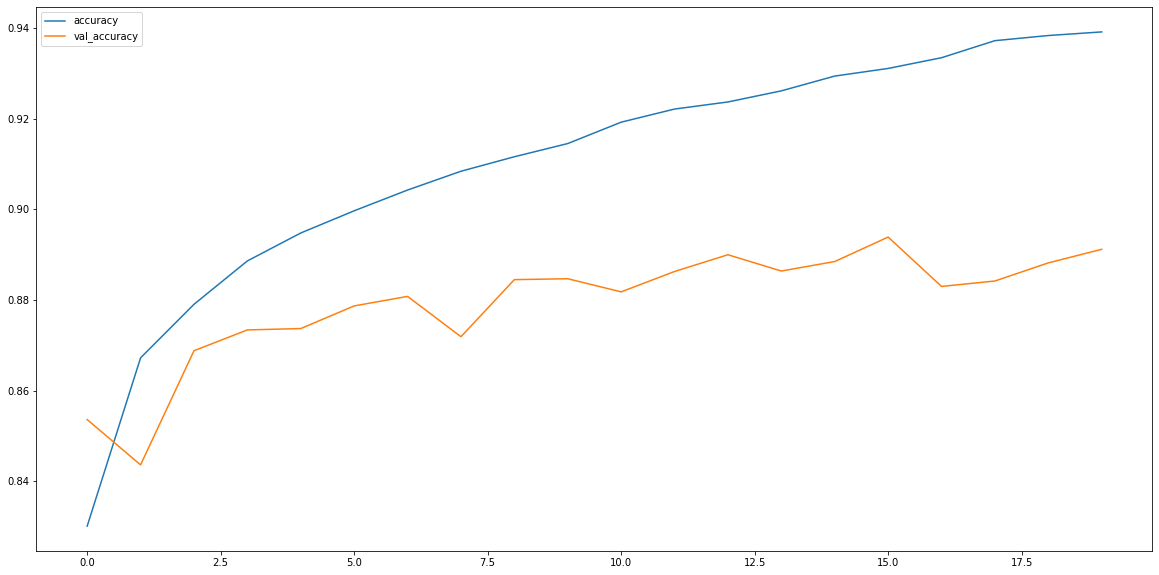

In [ ]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.show()

This model's performance was better than than the first model's. I'll try adjusting this number of neurons up again to see if I can get it to perform better. 

In [ ]:
# create a model object
model = Sequential()

# add layers to the model
# first dense layer
model.add(Dense(512, input_shape=(784,), activation='tanh'))
# second dense layer
model.add(Dense(256, activation='tanh'))
# output layer
model.add(Dense(10, activation='softmax'))

# define an optimizer and compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 80
epochs = 20

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5902 - accuracy: 0.7843 - val_loss: 0.4619 - val_accuracy: 0.8301
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3739 - accuracy: 0.8633 - val_loss: 0.3653 - val_accuracy: 0.8659
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3272 - accuracy: 0.8783 - val_loss: 0.3706 - val_accuracy: 0.8680
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3055 - accuracy: 0.8857 - val_loss: 0.3412 - val_accuracy: 0.8771
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2886 - accuracy: 0.8920 - val_loss: 0.3382 - val_accuracy: 0.8745
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2692 - accuracy: 0.8981 - val_loss: 0.3502 - val_accuracy: 0.8746
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2579 - accuracy: 0.9034 - val_loss: 0.3425 - val_accuracy: 0.8759
Epoch 

This model performed worse across the board vs. the last model. The last model performed better than any of the other models. 